In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.multivariate.image import JointRecurrencePlot
from pyts.datasets import load_basic_motions

In [ ]:

X, _, _, _ = load_basic_motions(return_X_y=True)
print(X.shape)
# Recurrence plot transformation
jrp = JointRecurrencePlot(threshold='point', percentage=50)
X_jrp = jrp.fit_transform(X)

# Show the results for the first time series
plt.figure(figsize=(5, 5))
x_one = X_jrp[4]
plt.imshow(x_one, cmap='binary', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()

In [39]:
def load_h5_file(input_file):
    print(input_file)
    df = pd.read_hdf(input_file)
    total_rows = len(df)
    # print("total rows in original file", total_rows)
    if total_rows > 90:
      center = round((len(df) * 0.6 ))
      frame_from = center - 45
      frame_to = center + 45
      df_subset = df.iloc[frame_from: frame_to]
    else:
      df_subset = df
    # print("total rows in the subset", len(df_subset))
    df_subset.reset_index()
    level_1 = df_subset.columns.levels[0]
    level_2 = df_subset.columns.levels[1]
    level_3 = df_subset.columns.levels[2]
    df_new = pd.DataFrame()
    l_1 = level_1[0]
    for l_2 in level_2:
        if not l_2:
            continue
        for l_3 in level_3:
            if not l_3:
                continue
            c_name = f"{l_2}_{l_3}"
            c = df_subset.loc[:, (l_1, l_2, l_3)]
            df_new[c_name] = c
    df_t = df_new.transpose()
    return df_t


h5_files/AbelTasmanDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 422
total rows in the subset 90
(69, 90, 90)


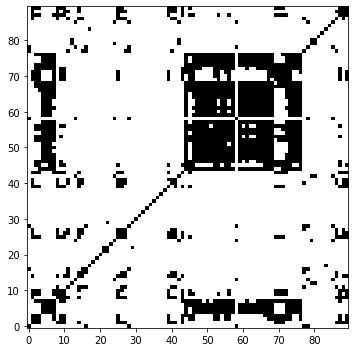

In [8]:

df_tx = load_h5_file('h5_files/AbelTasmanDLC_resnet50_veloxDec16shuffle1_590000.h5')
matrix = df_tx.to_numpy()
data = matrix.reshape((matrix.shape[0], 1, matrix.shape[1]))

jrp = JointRecurrencePlot(threshold='point', percentage=20)
jrp_data = jrp.fit_transform(data)
print(jrp_data.shape)
plt.figure(figsize=(5, 5))

plt.imshow(jrp_data[0], cmap='binary', origin='lower')
plt.tight_layout()
plt.show()

h5_files/AbelTasmanDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 422
total rows in the subset 90
(1, 46, 90)
(1, 90, 90)


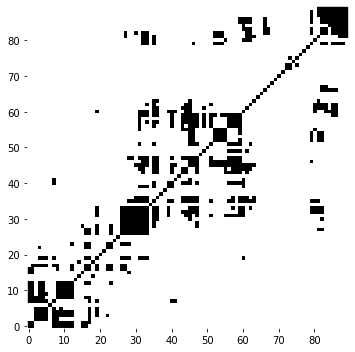

In [35]:
import numpy as np
df_tx = load_h5_file('h5_files/AbelTasmanDLC_resnet50_veloxDec16shuffle1_590000.h5')
return_rows = []
for i in range(0, 69):
    if i%3:
        return_rows.append(i)
df_tx = df_tx.iloc[return_rows]

data = np.array([df_tx.to_numpy()])
print(data.shape)
jrp = JointRecurrencePlot(threshold='point', percentage=90)
jrp_data = jrp.fit_transform(data)
print(jrp_data.shape)
plt.figure(figsize=(5, 5))
plt.imshow(jrp_data[0], cmap='binary', origin='lower')
plt.tight_layout()
plt.show()

# for _, i_data in enumerate(data[0]):
#     plt.plot(i_data)
#     plt.show()

h5_files/Gigijean_1DLC_resnet50_veloxDec16shuffle1_590000.h5
h5_files/Exoticnotion11920DLC_resnet50_veloxDec16shuffle1_590000.h5
h5_files/BrooklynswayDLC_resnet50_veloxDec16shuffle1_590000.h5
h5_files/DacitaDLC_resnet50_veloxDec16shuffle1_590000.h5
h5_files/MadisonAvenueDLC_resnet50_veloxDec16shuffle1_590000.h5


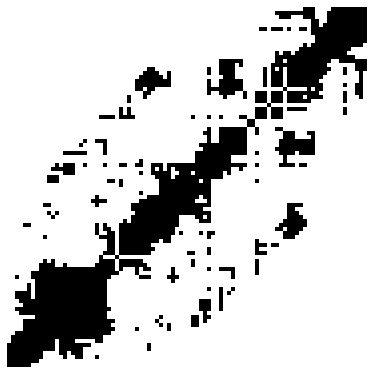

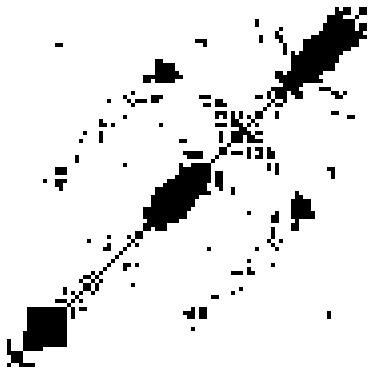

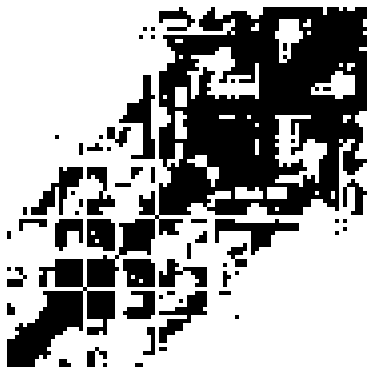

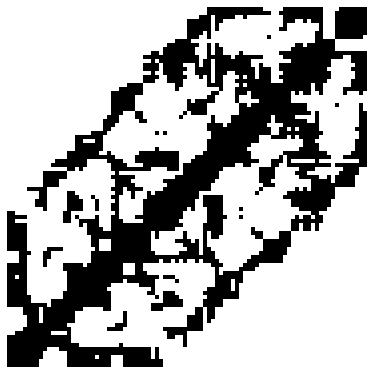

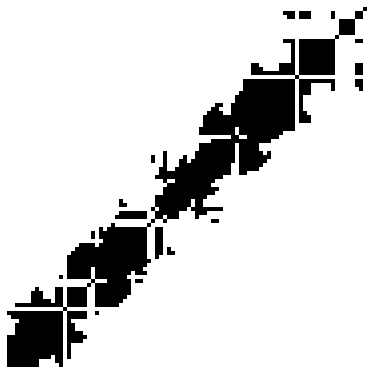

In [53]:
import os

h5_files = os.listdir('h5_files')
h5_files = h5_files[10:15]
data = []
for filename in h5_files:
    filepath = os.path.join('h5_files', filename)
    df_s = load_h5_file(filepath)
    return_rows = []
    for i in range(0, 69):
        if i%3:
            return_rows.append(i)
    df_s = df_s.iloc[return_rows]

    data = np.array([df_s.to_numpy()])
    jrp = JointRecurrencePlot(threshold='point', percentage=90)
    jrp_data = jrp.fit_transform(data)

    fig = plt.figure(figsize=(5, 5), frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(jrp_data[0], cmap='binary', origin='lower', aspect='auto')
    # plt.tight_layout()
    # plt.show()
    # fig.save



h5_files/AbelTasmanDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 422
total rows in the subset 90
(69, 1, 90)


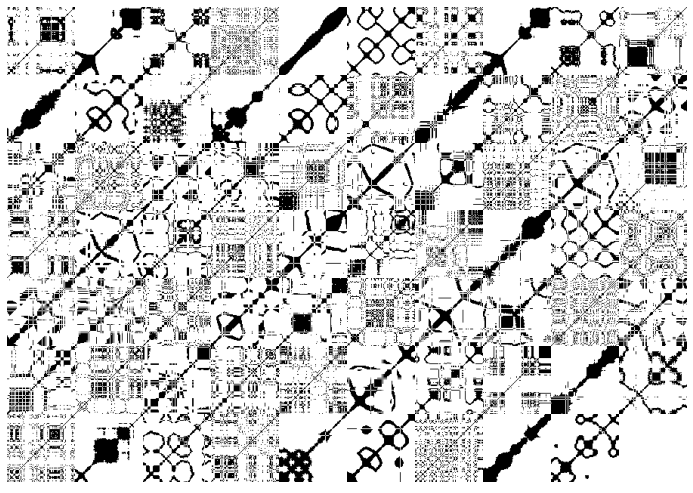

In [32]:
import matplotlib
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable

df_tx = load_h5_file('h5_files/AbelTasmanDLC_resnet50_veloxDec16shuffle1_590000.h5')
matrix = df_tx.to_numpy()
data = matrix.reshape((matrix.shape[0], 1, matrix.shape[1]))
print(data.shape)
per = 20
jrp = JointRecurrencePlot(threshold='point', percentage=per)
jrp_data = jrp.fit_transform(data)

image_columns = 10
image_rows = 7
image_pixels = 90 #  90 pixels per image (since we have 90 points)

px = 1/plt.rcParams['figure.dpi']  # size of a pixel

# Plot the corresponding images
fig_w = image_pixels*px*image_columns
fig_h = image_pixels*px*image_rows

fig = plt.figure(figsize=(fig_w, fig_h), frameon=False)

grid = ImageGrid(fig, 111,
                 nrows_ncols=(image_rows, image_columns),
                 axes_pad=0,
                 share_all=True,
                 )

grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
matplotlib.rc('axes',edgecolor='white')

for image, ax in zip(jrp_data, grid):
  ax.axis('off')
  im = ax.imshow(image, cmap='binary', origin='lower')

In [42]:
import os

h5_files = os.listdir('h5_files')
h5_files = h5_files[0:10]
data = []
for filename in h5_files:
    filepath = os.path.join('h5_files', filename)
    m = load_h5_file(filepath)
    data.append(m)

h5_files/WaltzwithcurlinDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 203
total rows in the subset 90
h5_files/SalutetheWarriorDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 349
total rows in the subset 90
h5_files/SouthamptonWayDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 283
total rows in the subset 90
h5_files/Lovelylil111720DLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 360
total rows in the subset 90
h5_files/SuperstacyDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 234
total rows in the subset 90
h5_files/FaypienDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 191
total rows in the subset 90
h5_files/Wideopen_1DLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 322
total rows in the subset 90
h5_files/ZendreyaDLC_resnet50_veloxDec16shuffle1_590000.h5
total rows in original file 289
total rows in the subset 90
h5_files/Euphoriu

In [43]:
from pyts.multivariate.image import JointRecurrencePlot

# image_columns = 10
# image_rows = 7
# image_pixels = 90  # 90 pixels per image (since we have 90 points)
#
# px = 1 / plt.rcParams['figure.dpi']  # size of a pixel
# fig_w = image_pixels * px * image_columns
# fig_h = image_pixels * px * image_rows
# # print(fig_w, fig_h)
# fig = plt.figure(figsize=(fig_w, fig_h), frameon=False)
jrp = JointRecurrencePlot(threshold='point', percentage=50)
jrp_df = jrp.fit_transform(data)

In [ ]:
for i, xx in enumerate(h5_files):
    plt.figure(figsize=(5, 5))
    plt.imshow(jrp_df[i], cmap='binary', origin='lower')
    plt.tight_layout()
plt.show()
